In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tracemalloc
import time
from memory_profiler import memory_usage

In [2]:
df = pd.read_csv('Electric_Vehicle_Data.csv')

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181055 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181055 non-null  object 
 1   County                                             181055 non-null  object 
 2   City                                               181055 non-null  object 
 3   State                                              181055 non-null  object 
 4   Postal Code                                        181055 non-null  float64
 5   Model Year                                         181055 non-null  int64  
 6   Make                                               181055 non-null  object 
 7   Model                                              181055 non-null  object 
 8   Electric Vehicle Type                              181055 non-null  object 
 9 

# Attribute Oriented Induction

## Attribute Removal

Extract characteristic rules using attribute-oriented induction. This task involves data generalization through
attribute removal or attribute generalization.

In [7]:
df.nunique()

VIN (1-10)                                            11055
County                                                   39
City                                                    468
State                                                     1
Postal Code                                             542
Model Year                                               22
Make                                                     40
Model                                                   143
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          103
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       181055
Vehicle Location                                        542
Electric Utility                                         75
2020 Census Tract                       

As we see above, DOL Vehicle ID is unique across all rows. Also VIN (1-10) is different across a large number of rows. Thus they are too specific and can be removed.

In [8]:
generalized_df = df.drop(columns=['VIN (1-10)', 'DOL Vehicle ID'])

## Attribute Generalization

In [9]:
generalized_df.sample(5)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle Location,Electric Utility,2020 Census Tract
59669,King,Snoqualmie,WA,98065.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,POINT (-121.8740496 47.5345546),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
42304,King,Seattle,WA,98107.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,36.0,POINT (-122.37815 47.66866),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
176772,Benton,Richland,WA,99354.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,8.0,POINT (-119.2905959 46.3041837),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10
85824,King,Kirkland,WA,98033.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,POINT (-122.20264 47.6785),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
85229,Thurston,Tumwater,WA,98501.0,2021,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


The concept hierarchy County<City exists. So, we can generalize as City.

In [32]:
generalized_df = generalized_df.drop(columns=['City'])

Postal Codes can be generalized to ZIP3 (first three digits), which groups nearby regions together.

In [11]:
generalized_df['Postal Code'] = generalized_df['Postal Code'].apply(lambda x: str(x)[:3])

The Model Year can be grouped into predefined ranges, simplifying year data.

In [12]:
generalized_df['Model Year'].unique()

array([2017, 2018, 2021, 2020, 2023, 2022, 2015, 2013, 2019, 2014, 2016,
       2024, 2011, 2012, 2010, 2008, 2000, 2002, 1998, 1997, 1999, 2003])

In [13]:
def generalize_year(year):
    if year <= 2000:
        return '2000 and before'
    elif year <= 2010:
        return '2001-2010'
    elif year <= 2020:
        return '2011-2020'
    else:
        return '2021 and after'

generalized_df['Model Year'] = generalized_df['Model Year'].apply(generalize_year)

The MSRP is grouped into broader price ranges, reducing the variability of the dataset.

In [14]:
generalized_df['Base MSRP'].unique()

array([     0,  69900,  64950,  39995,  53400,  55700,  31950,  52900,
        32250,  33950,  59900,  44100,  36800,  54950, 110950,  45600,
       184400,  52650,  98950,  36900,  34995,  81100, 109000,  90700,
        91250,  43700,  75095,  32995, 102000, 845000,  89100])

In [15]:
def generalize_msrp(msrp):
    if msrp <= 30000:
        return '0 - 30,000'
    elif msrp <= 50000:
        return '30,001 - 50,000'
    elif msrp <= 75000:
        return '50,001 - 75,000'
    elif msrp <= 100000:
        return '75,001 - 100,000'
    elif msrp <= 150000:
        return '100,001 - 150,000'
    elif msrp <= 200000:
        return '150,001 - 200,000'
    else:
        return '200,001 and above'

generalized_df['Base MSRP'] = generalized_df['Base MSRP'].apply(generalize_msrp)

The Electric Range can also be grouped into broader price ranges, reducing the variability of the dataset.

In [16]:
generalized_df['Electric Range'].unique()

array([ 16, 210,  25, 308,  21,  53, 322,  23, 238, 208,   0,  75,  18,
        87, 151,  26, 259,  84, 107, 204, 293, 150,  38, 239, 215,  19,
       220, 200,  22,  39, 266,  32,  83,  47,  37,  40, 291,  58, 330,
       149,  42,  73, 289,  30,  10, 203,  97,  35,  17,  33, 270, 125,
        15,  82,  11,  93,  20,  34,  29,  81,  72,   6, 258, 249,  68,
       126, 218,  14, 234, 110,   8, 153,  27, 111,   9, 114, 265,  36,
        13,  31,  12, 233, 337,  59, 245, 103, 100, 222,  41,  76, 124,
       192,  48,  62,  28, 170,  24,  46,  56,  95,  51,  57,  74])

In [17]:
def generalize_range(range_value):
    if range_value <= 50:
        return '0 - 50'
    elif range_value <= 100:
        return '51 - 100'
    elif range_value <= 150:
        return '101 - 150'
    elif range_value <= 200:
        return '151 - 200'
    elif range_value <= 300:
        return '201 - 300'
    else:
        return '301 and above'

generalized_df['Electric Range'] = generalized_df['Electric Range'].apply(generalize_range)

Vehicle Location and State are fully generalized, so we can drop

In [18]:
generalized_df = generalized_df.drop(columns=['Vehicle Location', 'State'])

Hierarchy Model<Make exists, so we can generalize to Make

In [19]:
generalized_df = generalized_df.drop(columns=['Model'])

We can retain the rest of the data as is.

In [20]:
generalized_df.sample(5)

,City,Postal Code,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
105974,Monroe,982,2021 and after,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0 - 50,"0 - 30,000",39.0,PUGET SOUND ENERGY INC,5.306105e+10
157165,Mill Creek,980,2011-2020,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,201 - 300,"0 - 30,000",44.0,PUGET SOUND ENERGY INC,5.306105e+10
110405,Olympia,985,2021 and after,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0 - 50,"0 - 30,000",2.0,PUGET SOUND ENERGY INC,5.306701e+10
58631,Mercer Island,980,2011-2020,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,201 - 300,"0 - 30,000",41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
16159,Kirkland,980,2021 and after,VOLKSWAGEN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0 - 50,"0 - 30,000",45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [21]:
generalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181055 entries, 0 to 181457
Data columns (total 11 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   City                                               181055 non-null  object 
 1   Postal Code                                        181055 non-null  object 
 2   Model Year                                         181055 non-null  object 
 3   Make                                               181055 non-null  object 
 4   Electric Vehicle Type                              181055 non-null  object 
 5   Clean Alternative Fuel Vehicle (CAFV) Eligibility  181055 non-null  object 
 6   Electric Range                                     181055 non-null  object 
 7   Base MSRP                                          181055 non-null  object 
 8   Legislative District                               181055 non-null  float64
 9 

In [22]:
generalized_df.nunique()

City                                                  468
Postal Code                                            14
Model Year                                              4
Make                                                   40
Electric Vehicle Type                                   2
Clean Alternative Fuel Vehicle (CAFV) Eligibility       3
Electric Range                                          6
Base MSRP                                               7
Legislative District                                   49
Electric Utility                                       75
2020 Census Tract                                    1767
dtype: int64

## Characteristic Rules

In [23]:
crosstab = pd.crosstab(generalized_df['Base MSRP'], generalized_df['Electric Range'])
crosstab

Electric Range,0 - 50,101 - 150,151 - 200,201 - 300,301 and above,51 - 100
Base MSRP,,,,,,
"0 - 30,000",128956,3767,2730,26971,2590,12742
"100,001 - 150,000",10,0,0,27,0,0
"150,001 - 200,000",10,0,0,0,0,0
"200,001 and above",1,0,0,0,0,0
"30,001 - 50,000",516,74,0,0,0,518
"50,001 - 75,000",586,0,0,1471,0,0
"75,001 - 100,000",66,0,0,20,0,0


In [24]:
def extract_rules(crosstab):
    rules = []
    for msrp_category in crosstab.index:
        for range_category in crosstab.columns:
            count = crosstab.loc[msrp_category, range_category]
            if count > 0:
                rule = f"IF Base MSRP is '{msrp_category}' THEN Electric Range is '{range_category}' with count {count}"
                rules.append(rule)
    return rules

rules = extract_rules(crosstab)
for rule in rules:
    print(rule)

IF Base MSRP is '0 - 30,000' THEN Electric Range is '0 - 50' with count 128956
IF Base MSRP is '0 - 30,000' THEN Electric Range is '101 - 150' with count 3767
IF Base MSRP is '0 - 30,000' THEN Electric Range is '151 - 200' with count 2730
IF Base MSRP is '0 - 30,000' THEN Electric Range is '201 - 300' with count 26971
IF Base MSRP is '0 - 30,000' THEN Electric Range is '301 and above' with count 2590
IF Base MSRP is '0 - 30,000' THEN Electric Range is '51 - 100' with count 12742
IF Base MSRP is '100,001 - 150,000' THEN Electric Range is '0 - 50' with count 10
IF Base MSRP is '100,001 - 150,000' THEN Electric Range is '201 - 300' with count 27
IF Base MSRP is '150,001 - 200,000' THEN Electric Range is '0 - 50' with count 10
IF Base MSRP is '200,001 and above' THEN Electric Range is '0 - 50' with count 1
IF Base MSRP is '30,001 - 50,000' THEN Electric Range is '0 - 50' with count 516
IF Base MSRP is '30,001 - 50,000' THEN Electric Range is '101 - 150' with count 74
IF Base MSRP is '30,00

In [28]:
crosstab2 = pd.crosstab(generalized_df['Electric Vehicle Type'], generalized_df['Electric Range'])
crosstab2

Electric Range,0 - 50,101 - 150,151 - 200,201 - 300,301 and above,51 - 100
Electric Vehicle Type,,,,,,
Battery Electric Vehicle (BEV),94576,3656,2727,28489,2590,9667
Plug-in Hybrid Electric Vehicle (PHEV),35569,185,3,0,0,3593


In [30]:
def extract_rules(crosstab):
    rules = []
    for evt_category in crosstab.index:
        for range_category in crosstab.columns:
            count = crosstab.loc[evt_category, range_category]
            if count > 0:
                rule = f"IF Electric Vehicle Type is '{evt_category}' THEN Electric Range is '{range_category}' with count {count}"
                rules.append(rule)
    return rules

rules = extract_rules(crosstab2)
for rule in rules:
    print(rule)

IF Electric Vehicle Type is 'Battery Electric Vehicle (BEV)' THEN Electric Range is '0 - 50' with count 94576
IF Electric Vehicle Type is 'Battery Electric Vehicle (BEV)' THEN Electric Range is '101 - 150' with count 3656
IF Electric Vehicle Type is 'Battery Electric Vehicle (BEV)' THEN Electric Range is '151 - 200' with count 2727
IF Electric Vehicle Type is 'Battery Electric Vehicle (BEV)' THEN Electric Range is '201 - 300' with count 28489
IF Electric Vehicle Type is 'Battery Electric Vehicle (BEV)' THEN Electric Range is '301 and above' with count 2590
IF Electric Vehicle Type is 'Battery Electric Vehicle (BEV)' THEN Electric Range is '51 - 100' with count 9667
IF Electric Vehicle Type is 'Plug-in Hybrid Electric Vehicle (PHEV)' THEN Electric Range is '0 - 50' with count 35569
IF Electric Vehicle Type is 'Plug-in Hybrid Electric Vehicle (PHEV)' THEN Electric Range is '101 - 150' with count 185
IF Electric Vehicle Type is 'Plug-in Hybrid Electric Vehicle (PHEV)' THEN Electric Range 

In [33]:
crosstab3 = pd.crosstab(generalized_df['Model Year'], generalized_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
crosstab3

Clean Alternative Fuel Vehicle (CAFV) Eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
Model Year,,,
2000 and before,14,0,0
2001-2010,46,0,0
2011-2020,54538,72,11457
2021 and after,12048,94494,8386


In [34]:
def extract_rules(crosstab):
    rules = []
    for my_category in crosstab.index:
        for eli_category in crosstab.columns:
            count = crosstab.loc[my_category, eli_category]
            if count > 0:
                rule = f"IF Model Year is '{my_category}' THEN (CAFV) Eligibility is '{eli_category}' with count {count}"
                rules.append(rule)
    return rules

rules = extract_rules(crosstab3)
for rule in rules:
    print(rule)

IF Model Year is '2000 and before' THEN (CAFV) Eligibility is 'Clean Alternative Fuel Vehicle Eligible' with count 14
IF Model Year is '2001-2010' THEN (CAFV) Eligibility is 'Clean Alternative Fuel Vehicle Eligible' with count 46
IF Model Year is '2011-2020' THEN (CAFV) Eligibility is 'Clean Alternative Fuel Vehicle Eligible' with count 54538
IF Model Year is '2011-2020' THEN (CAFV) Eligibility is 'Eligibility unknown as battery range has not been researched' with count 72
IF Model Year is '2011-2020' THEN (CAFV) Eligibility is 'Not eligible due to low battery range' with count 11457
IF Model Year is '2021 and after' THEN (CAFV) Eligibility is 'Clean Alternative Fuel Vehicle Eligible' with count 12048
IF Model Year is '2021 and after' THEN (CAFV) Eligibility is 'Eligibility unknown as battery range has not been researched' with count 94494
IF Model Year is '2021 and after' THEN (CAFV) Eligibility is 'Not eligible due to low battery range' with count 8386


## Implement the Bottom-Up Cube (BUC) algorithm.
- **In-Memory Implementation**: Assume that all CUBEs can be supported by the main
memory and write a straightforward implementation of BUC.

In [7]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


Since most values are 0, this is skewed by a small number of high values. It would be better to create bins that distinguish between entries with zero MSRP and those with non-zero MSRP:

- **0**: Entries with MSRP = 0 (likely missing or undefined).
- **1-50k**: Entries with MSRP > 0 up to 50,000.
- **50k-100k**: Entries with MSRP between 50,000 and 100,000.
- **100k-200k**: Entries with MSRP between 100,000 and 200,000.
- **200k+**: Entries with MSRP above 200,000.


In [8]:
# Inspecting the Base MSRP column to understand its distribution
base_msrp_summary = df['Base MSRP'].describe()
base_msrp_zero_count = (df['Base MSRP'] == 0).sum()

base_msrp_summary, base_msrp_zero_count


(count    181458.000000
 mean       1040.236749
 std        8228.989085
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max      845000.000000
 Name: Base MSRP, dtype: float64,
 178146)

In [9]:
# Inspecting the Electric Range column to understand its distribution
electric_range_summary = df['Electric Range'].describe()
electric_range_summary

count    181458.000000
mean         57.826665
std          91.396074
min           0.000000
25%           0.000000
50%           0.000000
75%          75.000000
max         337.000000
Name: Electric Range, dtype: float64

In [10]:
def preprocess_data(df):
    # Adding binned columns
    df['MSRP_Binned'] = pd.cut(df['Base MSRP'], 
                               bins=[-1, 0, 50000, 100000, 200000, float('inf')], 
                               labels=['0', '1-50k', '50k-100k', '100k-200k', '200k+'])
    
    df['Range_Binned'] = pd.cut(df['Electric Range'], 
                                bins=[-1, 0, 50, 100, 200, float('inf')], 
                                labels=['0', '1-50', '50-100', '100-200', '200+'])
    
    return df

#preprocessing
df = preprocess_data(df)   

In [11]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,MSRP_Binned,Range_Binned
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,0,1-50
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10,0,1-50
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10,0,200+
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10,0,1-50
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10,0,200+


In [12]:
# Aggregates unique values from the first column of data along with their counts
def aggregate(data):
    unique_attr, counts = np.unique(data[:, 0], return_counts=True)
    return unique_attr, counts

# BUC Implementation
def compute_cube(data, output_rec):
    dim = data.shape[1]
    
    # If no dimensions are left, append the output and count
    if dim == 0:
        all_cube.append(output_rec.copy())
        all_cube[-1].append(len(data))
        return
    
    # Convert all data to strings to handle mixed types uniformly
    data = data.astype(str)
    
    # Sort data based on the first column
    idx = data[:, 0].argsort()
    data = data[idx]

    # Get unique values and their counts for the first column
    unique_attr, datacount = aggregate(data)
    
    k = 0
    cardinality = len(unique_attr)
    
    # Iterate over each unique value in the first column
    for i in range(cardinality):
        count = datacount[i]
        if count >= min_sup:
            # Append the current unique attribute value
            output_rec.append(unique_attr[i])
            # Recursively compute cube for remaining columns
            compute_cube(data[k:k+count, 1:], output_rec)
            # Remove the value after recursion
            output_rec.pop()
        k += count
    
    # Handle the "ALL" case for the first column and recurse
    output_rec.append("ALL")
    compute_cube(data[:, 1:], output_rec)
    output_rec.pop()

# BUC algorithm for different min_sup values
min_sup_list = [100, 250, 500, 750, 1000]  # List of minimum support values
run_time = []  # To store execution times for each min_sup
memory_allot = []  # To store memory usage for each min_sup

# Preprocessing and selecting relevant columns
df = preprocess_data(df)
data = df[['State', 'City', 'Make', 'Model Year', 'MSRP_Binned', 'Range_Binned']].values  # Using relevant columns

# Loop through each minimum support value
for min_sup in min_sup_list:
    output_rec = []  # Temp list to store results of each computation
    all_cube = []  # Final list to store the entire computed cube
    
    start = time.time() 
    tracemalloc.start() 
    
    compute_cube(data, output_rec)  # BUC algorithm
    
    end = time.time()  
    
    # I'll save the result for min_sup == 100 to a CSV file
    if min_sup == 100:
        result = pd.DataFrame(all_cube)
        cols_name = ['State', 'City', 'Make', 'Model Year', 'MSRP_Binned', 'Range_Binned', 'count']
        result.columns = cols_name
        result.to_csv('result.csv', index=False)
    
    # Record peak memory usage in MB and stop tracing memory
    memory_allot.append((tracemalloc.get_traced_memory()[1]) / (1024 * 1024))  # Convert to MB
    tracemalloc.stop()
    
    run_time.append(end - start)

print("Run times for different min_sup values:", run_time)
print("Memory usage for different min_sup values (MB):", memory_allot)

Run times for different min_sup values: [11.512295961380005, 9.358802080154419, 8.950427293777466, 8.648793697357178, 8.593397855758667]
Memory usage for different min_sup values (MB): [376.89894676208496, 375.5819206237793, 374.9992971420288, 374.7277669906616, 374.59874057769775]


#### Runtime vs min_sup
- The runtime is slightly longer for lower min_sup values and tends to decrease as min_sup increases.
- Reason: Lower min_sup values result in a larger number of sub-cubes being considered, leading to more computation. As min_sup increases, fewer sub-cubes meet the support threshold, reducing the computation time.

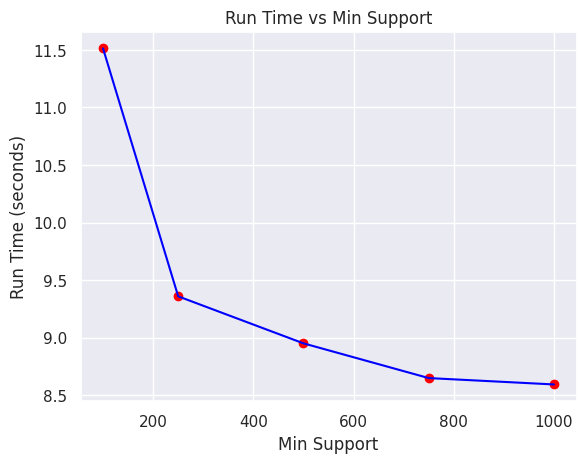

In [13]:
sns.set()
plt.figure()
plt.plot(min_sup_list, run_time, label='Run Time', color='blue')
plt.scatter(min_sup_list, run_time, marker='o', color='red')
plt.xlabel("Min Support")
plt.ylabel("Run Time (seconds)")
plt.title("Run Time vs Min Support")
plt.show()

#### Memory usage vs min_sup
- The memory usage is highest for the lowest min_sup value (100) and decreases as min_sup increases.
- Reason: Similar to runtime, a lower min_sup value means that more sub-cubes are generated and stored, requiring more memory. As min_sup increases, fewer sub-cubes are kept in memory, leading to reduced memory usage.

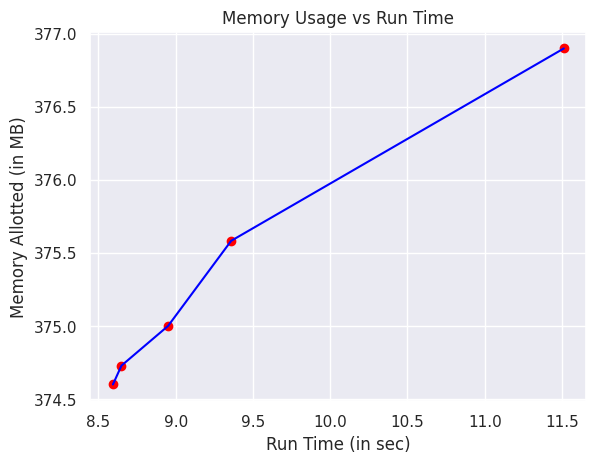

In [14]:
sns.set()
plt.figure()
plt.plot(run_time, memory_allot, label='Memory Usage', color='blue')
plt.scatter(run_time, memory_allot, marker="o", color="red") 
plt.ylabel("Memory Allotted (in MB)")
plt.xlabel("Run Time (in sec)")
plt.title("Memory Usage vs Run Time")
plt.show()

### Memory constraint BUC
- Out-of-Memory Implementation: Assume that the program will run out of main memory and introduce paging in your implementation.

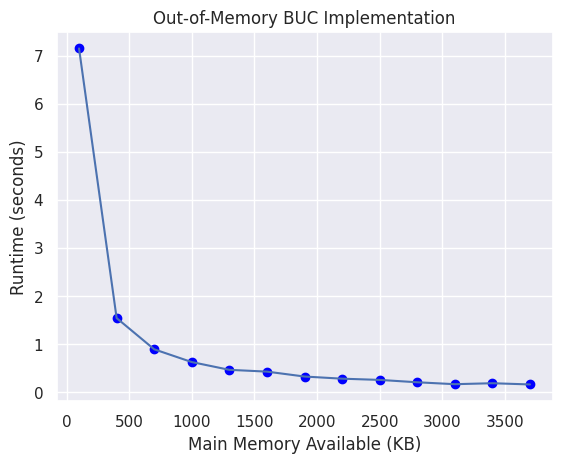

In [15]:
# memory usage in KB
totalKBMemory = df.memory_usage().sum() / 1024

# Define column count for paging
num_col = len(df.columns)

# Set the range of memory sizes for paging simulation
listMemory = []
listTime = []

# Vary memory from 100 KB to 4000 KB in steps of 300 KB
for mainKBMemory in range(100, 4000, 300):
    # Calculate the number of pages based on available memory
    number_of_pages = int(totalKBMemory / mainKBMemory)
    initialTime = time.time()

    # Simulate paging by creating and processing chunks of data
    for i in range(number_of_pages):
        # Slice a "page" from the dataframe
        dataFrame = df.iloc[i * num_col:(i + 1) * num_col, :]

        # BUC algorithm on this page
        for j in range(num_col):
            compute_cube(dataFrame.values, [])

    finalTime = time.time()
    listTime.append(finalTime - initialTime)
    listMemory.append(mainKBMemory)

# memory size vs runtime
sns.set()
plt.figure()
plt.plot(listMemory, listTime)
plt.scatter(listMemory, listTime, marker="o", color="blue")
plt.xlabel("Main Memory Available (KB)")
plt.ylabel("Runtime (seconds)")
plt.title("Out-of-Memory BUC Implementation")
plt.show()

# # for plotting memory usage vs min_sup

# min_sup_list = [100, 250, 500, 750, 1000]
# memory_allot = []

# # Running BUC with different min_sup values
# for min_sup in min_sup_list:
#     output_rec = []
#     all_cube = []
    
#     tracemalloc.start()  # Start memory tracking
#     compute_cube(df.values, output_rec)
#     memory_allot.append((tracemalloc.get_traced_memory()[1]) / (1024 * 1024))  # Memory in MB
#     tracemalloc.stop()

# # memory usage vs min_sup
# plt.figure()
# plt.plot(min_sup_list, memory_allot, color='green')
# plt.scatter(min_sup_list, memory_allot, marker="o", color="green")
# plt.xlabel("Min Support")
# plt.ylabel("Memory Usage (MB)")
# plt.title("Memory Usage vs Min Support")
# plt.show()


# print("Min Support values:", min_sup_list)
# print("Memory Usage (MB):", memory_allot)

- The output aligns with what we expect from an out-of-memory implementation. 

- Memory Sizes (KB): we have a range of memory sizes increasing from 100 KB to 3700 KB in steps of 300 KB. This is in line with the paging simulation where more memory allows larger "pages" of data to be processed at once.

- Run Times (secs): the times generally decrease as the memory size increases, which makes sense because larger memory means fewer pages, leading to less overhead and faster execution.

- There are slight fluctuations (e.g., at 2800 KB vs 2500 KB), but its possible in real-world scenarios due to system and memory management factors.

## Optimization Technique

In [18]:
min_sup = 100
cache = {}
cube_results = []

def buc(df, dims, dim_index, cell):
    """Bottom-up computation of Iceberg CUBE with optimizations"""
    if dim_index >= len(dims):
        return

    cur_dim = dims[dim_index]
    
    # Create a hashable key based on the current DataFrame and dimension
    df_key = (cur_dim, tuple(df[cur_dim].values))  # Create a unique key for caching

    if df_key in cache:
        grouped = cache[df_key]
    else:
        # Group by current dimension and count occurrences
        grouped = df.groupby(cur_dim).size().sort_values(ascending=False)
        cache[df_key] = grouped  # Cache the result

    for value, count in grouped.items():
        if count >= min_sup:  # Apriori Pruning
            cell_copy = cell.copy()
            cell_copy[cur_dim] = value
            
            # Store the result (cell + count) as a dictionary in the list
            result = {dim: cell_copy.get(dim, 'ALL') for dim in dims}  # 'ALL' for aggregation
            result['Count'] = count
            cube_results.append(result)  # Append the result to the list

            # Filter the DataFrame for the next dimension
            df_filtered = df[df[cur_dim] == value]
            
            # Move to the next dimension and aggregate from the smallest child
            buc(df_filtered, dims, dim_index + 1, cell_copy)

dims = ['County', 'City', 'State', 'Make', 'Model', 'Model Year', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
# Sort dimensions based on cardinality (number of unique values) to optimize processing order
dims = sorted(dims, key=lambda dim: df[dim].nunique())
# Start with an empty cell
initial_cell = {dim: None for dim in dims}

buc(df, dims, 0, initial_cell)
cube_df = pd.DataFrame(cube_results)
cube_df

,State,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Model Year,County,Make,Model,City,Count
0,WA,None,None,NaN,None,None,None,None,181055
1,WA,Battery Electric Vehicle (BEV),None,NaN,None,None,None,None,141705
2,WA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,None,None,None,None,94566
3,WA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,2023.0,None,None,None,None,51082
4,WA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,2023.0,King,None,None,None,27931
...,...,...,...,...,...,...,...,...,...
991,WA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,2020.0,King,None,None,None,169
992,WA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,2020.0,King,CHRYSLER,None,None,108
993,WA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,2020.0,King,CHRYSLER,PACIFICA,None,108
994,WA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,2016.0,None,None,None,None,400


In [19]:
def benchmark_execution_time(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

execution_time_optimized = benchmark_execution_time(buc, df, dims, 0, initial_cell)
print(f"Execution time (Optimized BUC): {execution_time_optimized:.4f} seconds")

Execution time (Optimized BUC): 0.6824 seconds


In [20]:
def benchmark_memory_usage(func, *args):
    mem_usage = memory_usage((func, args), interval=0.1)
    return max(mem_usage)  # Peak memory usage during the function execution

memory_usage_optimized = benchmark_memory_usage(buc, df, dims, 0, initial_cell)
print(f"Memory usage (Optimized BUC): {memory_usage_optimized:.2f} MB")

Memory usage (Optimized BUC): 503.21 MB


In [21]:
cube_results = []

def no_buc(df, dims, dim_index, cell):
    """Non-Optimized Bottom-Up Computation (BUC) of the Data Cube."""
    
    # Base case: If all dimensions have been processed, return
    if dim_index == len(dims):
        return

    # Get current dimension
    cur_dim = dims[dim_index]

    # Group by the current dimension and count occurrences
    grouped = df.groupby(cur_dim).size()

    for value, count in grouped.items():
        if count > 0:  # No pruning for non-optimized version
            cell_copy = cell.copy()
            cell_copy[cur_dim] = value
            cube_results.append({**cell_copy, 'count': count})

            # Recursive call to process the next dimension
            no_buc(df[df[cur_dim] == value], dims, dim_index + 1, cell_copy)
    
    # Process "ALL" for current dimension (aggregate for this dimension)
    if len(df) > 0:
        cube_results.append({**cell, 'count': len(df)})
        no_buc(df, dims, dim_index + 1, cell)

dims = ['County', 'City', 'State', 'Make', 'Model', 'Model Year', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
initial_cell = {dim: None for dim in dims}
no_buc(df, dims, 0, initial_cell)
no_cube_df = pd.DataFrame(cube_results)
no_cube_df

,County,City,State,Make,Model,Model Year,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,count
0,Adams,None,None,None,None,NaN,None,None,51
1,Adams,Hatton,None,None,None,NaN,None,None,1
2,Adams,Hatton,WA,None,None,NaN,None,None,1
3,Adams,Hatton,WA,TESLA,None,NaN,None,None,1
4,Adams,Hatton,WA,TESLA,MODEL 3,NaN,None,None,1
...,...,...,...,...,...,...,...,...,...
4066635,None,None,None,None,None,NaN,None,None,181055
4066636,None,None,None,None,None,NaN,None,Clean Alternative Fuel Vehicle Eligible,66646
4066637,None,None,None,None,None,NaN,None,Eligibility unknown as battery range has not b...,94566
4066638,None,None,None,None,None,NaN,None,Not eligible due to low battery range,19843


In [22]:
def benchmark_execution_time(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

execution_time_non_optimized = benchmark_execution_time(no_buc, df, dims, 0, initial_cell)
print(f"Execution time (Non-Optimized BUC): {execution_time_non_optimized:.4f} seconds")

Execution time (Non-Optimized BUC): 593.6238 seconds


In [23]:
def benchmark_memory_usage(func, *args):
    mem_usage = memory_usage((func, args), interval=0.1)
    return max(mem_usage)  # Peak memory usage during the function execution

memory_usage_non_optimized = benchmark_memory_usage(no_buc, df, dims, 0, initial_cell)
print(f"Memory usage (Non-Optimized BUC): {memory_usage_non_optimized:.2f} MB")

Memory usage (Non-Optimized BUC): 4354.17 MB


As we can see, computation time is drastically reduced when using optimized iceberg BUC as compared to the non-optimized BUC cube technique. There is also significant reduction in the memory usage in the optimized version. Also, the no. of cuboids computed in the optimized version is far smaller than in the non-optimized version.

## Comparison of BUC and AOI 

### 1. Primary Purposes and Use Cases:

#### BUC

__Purpose__: BUC is designed for efficient computation of a data cube for OLAP (Online Analytical Processing). It aims to aggregate data across multiple dimensions and is used in data warehousing and multidimensional databases to support decision-making and data analysis.  
__Use Case__: BUC is primarily used when you need to perform multidimensional aggregation over a large dataset. For example, computing the count of cars per State, County, Make, Model and City.

#### AOI

__Purpose__: AOI is a data generalization technique used in data mining to abstract data by replacing specific attribute values with more general ones. It is used to find higher-level patterns or concepts in large datasets.  
__Use Case__: AOI is typically used in concept description tasks such as summarizing data in more general terms, often for decision tree learning, clustering, or summarizing large sets of transactions in a more comprehensible way. For, example Summarizing Electric Ranges of Vehicles in groups like '0-50', '51-100', '101-150', '151-200', etc. that can be interpreted as very low, low, medium, high, etc.

### 2. Types of Insights or Patterns:

#### BUC

__Insights__: BUC is best suited for discovering aggregated patterns across multiple dimensions, like trends, correlations, and outliers. It computes data cubes and can highlight regions in a dataset that meet certain criteria (e.g., sales exceeding a threshold).  
__Example__: For example, cars in the county King (94460) vastly outnumber those in the county Skamania (196).

#### AOI

__Insights__: AOI is effective for discovering generalized patterns, typically by summarizing data at a higher abstraction level. It is used to find concept hierarchies and can extract more meaningful patterns from raw data.  
__Example__: AOI could show that the '0-50' electric range has the highest instances of the lowest Base MSRP bracket of '0-30,000' (128956 instances)

### 3. Computational Efficiency and Scalability:

#### BUC

__Efficiency__: BUC can be computationally expensive, especially with high-dimensional data, because it explores and aggregates across all possible cuboids. However, it employs pruning techniques like Apriori to improve efficiency by focusing only on the cuboids that meet certain criteria (like minimum support).  
__Scalability__: BUC scales reasonably well with optimizations like sorting dimensions by cardinality and caching intermediate results, but its complexity grows with the number of dimensions and the size of the data.  
__Example__: In the cars dataset, BUC calculates the count of cars in a particular County, having a particular Make, etc. but only in cases which meet the minimum support threshold criteria (County King meets the min. sup. criteria, while County Skamania does not meet this criteria with any possible Make. It is fast if we use limited dimensions but cube computation time increases drastically as we consider more and more dimensions.

#### AOI

__Efficiency__: AOI is generally more efficient than BUC because it performs data reduction by summarizing or generalizing attributes. It doesn’t compute aggregates for all possible combinations but instead generalizes data into broader categories.  
__Scalability__: AOI is highly scalable for large datasets because it works by reducing the data’s dimensionality through abstraction rather than aggregating data across multiple dimensions.  
__Example__: For a dataset with detailed car attributes, AOI would drop VIN attribute because it is too unique and does not provide meaningful information and also group attributes like Make, Electric Range, Base MSRP, etc.

### 4. Interpretability of the Results:

#### BUC

__Interpretability__: The results from BUC are highly interpretable for users familiar with OLAP-style reports. The output is a data cube, where users can easily drill down or roll up to explore different levels of aggregation. While the results are structured, the complexity grows with the number of dimensions, making it harder to interpret all combinations of aggregated data if many dimensions are involved.  
__Example__: A user can interpret the total count for "County King" and "Make TESLA" in "City Seattle" but as more dimensions are added, the cube becomes harder to navigate.  

#### AOI

__Interpretability__: AOI produces highly interpretable results by summarizing and generalizing the data into more human-readable categories. The generalization helps users grasp high-level patterns without needing to drill into specific combinations. Since AOI reduces dimensionality by generalizing data, the results are easier to interpret but may lose granularity.  
__Example__: A user can easily interpret that "Low Electric Range" correlates with "Low Base MSRP" , but may not see the exact breakdown of this pattern when considered along with other attributes like Make and Year.

### 5. Scenarios Where One Might Be Preferable Over the Other:

#### BUC

__Scenario__: When you need detailed multidimensional aggregation and exploration of data across various levels of granularity. If the goal is to support decision-making through OLAP cubes where users can drill into or roll up the data, BUC is ideal.  
__Example__: For someone planning sales of cars, the amount of cars of different types present in different location may help them understand popularity of cars and help them determine the best sales strategies.

#### AOI

__Scenario__: When the goal is to summarize large amounts of detailed data into more abstract, human-readable insights. AOI is useful for generating reports that highlight broader patterns without needing the user to manually drill into specifics.  
__Example__: In customer segmentation, AOI can help generalize a dataset by grouping cars based on Model Year, Electric Range, etc, and see how these correlate with Clean Fuel Eligibility, Base MSRP values, etc.